### 목표
- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자!

In [1]:
!pip install scikit-learn

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
data = pd.read_csv('bmi_500.csv', index_col='Label')

In [4]:
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [5]:
# 전체 row(데이터)수, 컬럼 수 및 정보, 결측치 여부, 데이터 타입

data.info()
# 결측치 없어요 ~

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [6]:
# 기술통계(통계수치에서도 의미가있는값) 확인
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [7]:
# label 데이터 확인
data.index.unique()
# 정답 클래스는 6 종류로 이루어짐

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

### 각 비만도 등급별로 시각화
- 시각화를 통해서 데이터가 어떻게 분포되어있는지 보기위해 (파악하기위해)
- 산점도 : 두변수 사이에 어떤관계가있고 어떻게 분포가되어있는지 점을 찍어 나타내는

In [8]:
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [9]:
# 'Normal' 등급인 데이터만 가져오기  (행데이터가져오기) 컬럼가져오는건 그냥 data['Gender'] 이거였는데 행데이터를 가져오려면 loc사용
# normal에 해당하는 데이터 찾기
data.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [10]:
# 'Normal', 'Obesity'인 'Height'에 해당하는 값 가져오기! -> list만들어서 행 두개 가져올 수 있음. 


data.loc[['Normal','Obesity'],'Height']

Label
Normal     189
Normal     195
Normal     155
Normal     191
Normal     172
          ... 
Obesity    146
Obesity    188
Obesity    173
Obesity    198
Obesity    184
Name: Height, Length: 199, dtype: int64

In [14]:
#함수정의

#시각화 함수 생성

def myScatter(label,color):
    tmp  = data.loc[label] # label에 따라서 데이터를 가져옵니다
    plt.scatter(tmp['Weight'],
               tmp['Height'],
               c = color,
               label = label)

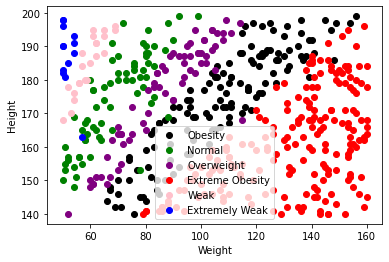

In [16]:
# 시각화 
myScatter('Obesity','black')
myScatter('Normal','green')
myScatter('Overweight', 'purple')
myScatter('Extreme Obesity','red')
myScatter('Weak','pink')
myScatter('Extremely Weak','blue')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()


In [ ]:
data.index.unique()

### 모델링
- 1. 문제와 답으로 분리
- 2. train(훈련셋)과 test(평가셋)분리
- 3. 모델생성 및 하이퍼파라미터 조정
- 4. 학습 및 평가


In [17]:
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [20]:
#인덱스를 다시 컬럼으로 리셋시키자 (이전에 시각화 하기위해서 label로 묶어놨엇음)
data.reset_index(inplace =True)

#아래서 data쳐서 확인해보니 리셋 안되잇네? 그럴때 사용하는게 inplace 전에 꺼 실행시키는

In [21]:
data

,Label,Gender,Height,Weight
0,Obesity,Male,174,96
1,Normal,Male,189,87
2,Obesity,Female,185,110
3,Overweight,Female,195,104
4,Overweight,Male,149,61
...,...,...,...,...
495,Extreme Obesity,Female,150,153
496,Obesity,Female,184,121
497,Extreme Obesity,Female,141,136
498,Extreme Obesity,Male,150,95


In [ ]:
# 문제와 정답 분리하기!
#보통 머신러닝에서 X는 대문자 , y는 소문자를 사용

In [27]:
y = data['Label']
X = data[['Height','Weight']]

In [25]:
y

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

In [28]:
X

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [35]:
# train, test 분리  - (7:3 으로 분리)
# 데이터가 500개닌까 train - 350, test 150
X_train = X.iloc[:350]  # 트레이닝에 사용할 훈련 문제
X_test = X.iloc[350:]   # 평가 문제
y_train = y.iloc[:350]   # 훈련 답
y_test = y.iloc[350:]    # 평가 답

In [36]:
X_train

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
345,184,106
346,191,68
347,162,58
348,178,138


In [37]:
X_test

,Height,Weight
350,184,83
351,197,88
352,160,51
353,184,153
354,190,50
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [38]:
y_train

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
345            Obesity
346             Normal
347             Normal
348    Extreme Obesity
349             Normal
Name: Label, Length: 350, dtype: object

In [39]:
y_test

350             Normal
351             Normal
352             Normal
353    Extreme Obesity
354     Extremely Weak
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 150, dtype: object

In [42]:
X_train.shape,X_test.shape
y_train.shape,y_test.shape

((350,), (150,))

In [ ]:
# 3. 모델 생성
# knn 이라는 모델이 있음
# scikit learn 라이브러리 에  모델들도 담겨잇음

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#모델 생성 (학습시킬 대상을 이 주피터 파일로 가지고온것)

knn_model = KNeighborsClassifier()

In [45]:
# 4. 모델 학습
# .fit(훈련시킬데이터) - 학습을 시킨다 (학습시키는 함수!)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
# 5. 예측하기! predict
pre = knn_model.predict(X_test)  # ---> 규칙을 스스로 찾아서 184dp 83이면 과체중이야 이런식으로 혼자 알아냄

In [49]:
pre

array(['Overweight', 'Normal', 'Normal', 'Extreme Obesity',
       'Extremely Weak', 'Obesity', 'Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme

In [50]:
# 잘 트레인됬나 채점!!!!(평가!!!)
from sklearn import metrics
# metrics 평가해줄 모듈

In [51]:
pre # X_test로 예측한 값
y_test # X_test의 실제 정답

350             Normal
351             Normal
352             Normal
353    Extreme Obesity
354     Extremely Weak
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 150, dtype: object

In [54]:
# 정확도!
metrics.accuracy_score(pre,y_test) # 실제답, 예측 값 넣고 비교 ! (전체중에 얼마나 맞췃는지!)

0.9066666666666666

In [53]:
y_test

350             Normal
351             Normal
352             Normal
353    Extreme Obesity
354     Extremely Weak
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 150, dtype: object

#### 하이퍼 파라미터 조정
- 사람이 임의로 조절할수 있는 매개변수 

In [ ]:
#하이퍼파리미터 조절 - 정확도를 좀더 높이기위해서 

In [56]:
#모델 새로 생성 (매개변수 조절해서 새로만드는!)
# knn모델의 n_neighbors(이웃의 수 - 하이퍼파라미터)  - 하이퍼파라미터를 조정해서 새로운 모델을 만들거야
knn_model2 = KNeighborsClassifier(n_neighbors = 10)

In [57]:
# 이웃의 수가 10인 knn모델 학습!
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [59]:
# 새로 학습된 모델로 예측
pre2 = knn_model2.predict(X_test)

In [60]:
pre2

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'E

In [61]:
# 예측한 결과평가 !
metrics.accuracy_score(y_test,pre2)

0.9333333333333333

### 활용하기 !

In [62]:
knn_model2.predict([[185,43]])

array(['Extremely Weak'], dtype=object)

In [64]:
knn_model2.predict([[185,43],[170,61],[170,10]])

array(['Extremely Weak', 'Normal', 'Normal'], dtype=object)